In [1]:
# Utility
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import os
import seaborn as sn

#Scikit Learn
from sklearn import svm
from sklearn.svm import SVR
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

#Catboost
from catboost import CatBoostRegressor
from catboost import Pool

## Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers

In [2]:
path = r"C:\Users\sbsro\Documents\ML_Projects\House Prices Problem"
os.chdir(path)

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 150)

### Visualization

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
sn.set_theme(style="darkgrid")

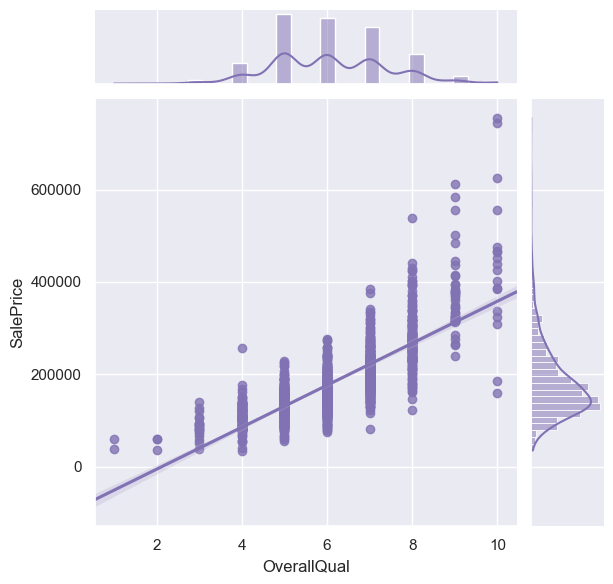

In [7]:
fig1 = sn.jointplot(x="OverallQual", y="SalePrice",data = train, kind = 'reg', truncate = False, color= "m"
                   )

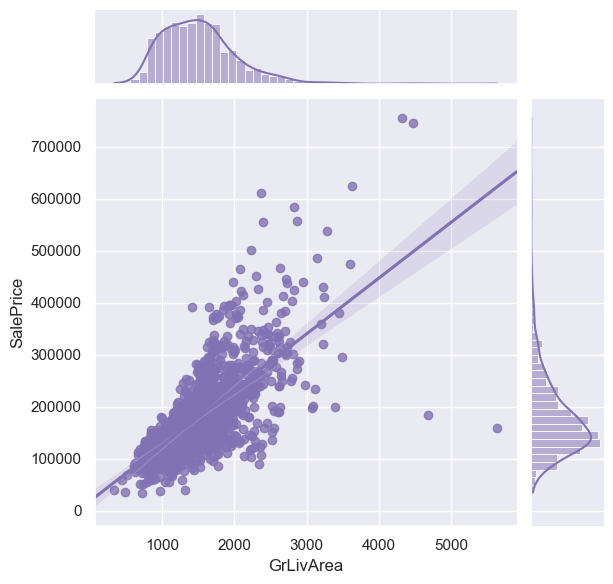

In [8]:
fig2 = sn.jointplot(x="GrLivArea", y="SalePrice", data = train, kind = 'reg', truncate = False, color= "m")

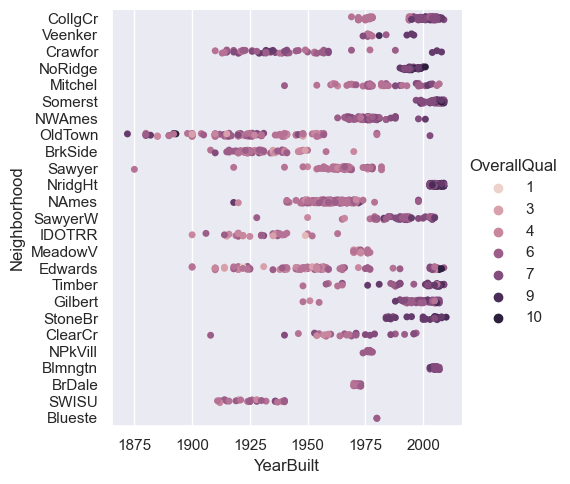

In [9]:
fig3 = sn.catplot(data = train, x = 'YearBuilt', y = 'Neighborhood', hue= "OverallQual")

In [10]:
class Preprocessing():
    def __init__(self):
        pass
    
    def Encode(self,data):
        ordinal_encoder = OrdinalEncoder()
        cl = ["MSZoning", "LotShape", "LandContour", "Utilities", "LotConfig", "Neighborhood", "Condition1",
             "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", "OverallCond", "RoofStyle",
             "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", 
              "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC",
             "Electrical", "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual",
             "GarageCond", "SaleType", "SaleCondition"]
        encoded_data = ordinal_encoder.fit_transform(data[cl])
        data[cl] = encoded_data
        return data
    def Drop(self,data):
        data.drop(columns = ["Alley", "PoolQC", "Fence", "MiscFeature"], inplace = True)
        return data
    
    def Impute(self, data):
        imputer = KNNImputer(n_neighbors= 10)
        data[data.columns[data.isna().any()].tolist()] = imputer.fit_transform(data[data.columns[data.isna().any()].tolist()])
        return data
    
    def onehot(self,data):
        one_hot= list(data.select_dtypes('object'))
        data = pd.get_dummies(data, columns = one_hot)
        return data
    
    def fit_transform(self, data):
        self.Drop(data)
        self.Encode(data)
        self.Impute(data)
        return self.onehot(data)
        

In [11]:
preprocessor = Preprocessing()

In [12]:
train = preprocessor.fit_transform(train)

In [13]:
test = preprocessor.fit_transform(test)

In [14]:
train, test = train.align(test, join = 'outer', axis = 1, fill_value=0)

In [23]:
clf = IsolationForest(max_samples = 50, random_state=42)
clf.fit(train)

IsolationForest(max_samples=50, random_state=42)

In [24]:
ano = clf.predict(train)

In [25]:
ano = pd.DataFrame(ano, columns = ['Anomalies'])

In [26]:
ano.value_counts()

Anomalies
 1           1290
-1            170
Name: count, dtype: int64

In [27]:
train = train.iloc[ano[ano['Anomalies'] == 1].index.values]

In [28]:
train

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir_N,CentralAir_Y,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolArea,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,0.0,3.0,3.0,706,0,2.0,5.0,1,0,2.0,150,False,True,2.0,2.0,4.0,0,4.0,2.0,12.0,13.0,2.4,0,2.0,2,6.0,548,2,4.0,1.0,4.0,1.0,2003.0,1710,1,1.0,0.0,5.0,1,1,2.0,3.0,True,False,False,8450,4.0,65.0,3.0,0,60,3.0,196.0,1.0,0,2,5.0,61,4.0,6.0,False,False,True,0,1.0,1.0,4.0,208500,8.0,0,False,True,8,856,0.0,0,2003,2003,2008
1,1262,0,0,3,0.0,3.0,1.0,978,0,0.0,5.0,0,1,2.0,284,False,True,1.0,2.0,4.0,0,4.0,3.0,8.0,8.0,4.0,1,1.0,2,6.0,460,2,4.0,1.0,4.0,1.0,1976.0,1262,0,1.0,0.0,2.0,2,1,3.0,3.0,True,False,False,9600,2.0,80.0,3.0,0,20,3.0,0.0,1.1,0,5,24.0,0,7.0,5.0,False,False,True,0,1.0,1.0,4.0,181500,8.0,0,False,True,6,1262,0.0,298,1976,1976,2007
2,920,866,0,3,0.0,3.0,2.0,486,0,2.0,5.0,1,0,2.0,434,False,True,2.0,2.0,4.0,0,4.0,2.0,12.0,13.0,4.0,1,2.0,2,6.0,608,2,4.0,1.0,4.0,1.0,2001.0,1786,1,1.0,0.0,5.0,3,1,2.0,3.0,True,False,False,11250,4.0,68.0,0.0,0,60,3.0,162.0,1.0,0,9,5.0,42,4.0,6.0,False,False,True,0,1.0,1.0,4.0,223500,8.0,0,False,True,6,920,0.0,0,2001,2002,2008
3,961,756,0,3,0.0,1.0,3.0,216,0,0.0,5.0,1,0,3.0,540,False,True,2.0,2.0,4.0,272,4.0,3.0,13.0,15.0,2.0,1,0.0,1,6.0,642,3,4.0,2.0,4.0,5.0,1998.0,1717,0,1.0,2.0,5.0,4,1,2.0,3.0,True,False,False,9550,0.0,60.0,0.0,0,70,3.0,0.0,1.0,0,2,6.0,35,4.0,6.0,False,False,True,0,1.0,1.0,0.0,140000,8.0,0,False,True,7,756,0.0,0,1915,1970,2006
4,1145,1053,0,4,0.0,3.0,0.0,655,0,2.0,5.0,1,0,2.0,490,False,True,2.0,2.0,4.0,0,4.0,2.0,12.0,13.0,4.0,1,2.0,2,6.0,836,3,4.0,1.0,4.0,1.0,2000.0,2198,1,1.0,0.0,5.0,5,1,2.0,3.0,True,False,False,14260,2.0,84.0,0.0,0,60,3.0,350.0,1.0,0,12,15.0,84,4.0,7.0,False,False,True,0,1.0,1.0,4.0,250000,8.0,0,False,True,9,1145,0.0,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,0,3,0.0,3.0,3.0,0,0,5.0,5.0,0,0,2.0,953,False,True,2.0,2.0,4.0,0,4.0,3.0,12.0,13.0,4.0,1,2.0,2,6.0,460,2,4.0,1.0,4.0,1.0,1999.0,1647,1,1.0,0.0,5.0,1456,1,3.0,3.0,True,False,False,7917,4.0,62.0,3.0,0,60,3.0,0.0,1.1,0,8,8.0,40,4.0,5.0,False,False,True,0,1.0,1.0,4.0,175000,8.0,0,False,True,7,953,0.0,0,1999,2000,2007
1456,2073,0,0,3,0.0,3.0,3.0,790,163,0.0,4.0,1,0,2.0,589,False,True,2.0,2.0,4.0,0,4.0,3.0,9.0,10.0,4.0,2,1.0,2,2.0,500,2,4.0,2.0,4.0,1.0,1978.0,2073,0,1.0,4.0,2.0,1457,1,3.0,3.0,True,False,False,13175,4.0,85.0,3.0,0,20,3.0,119.0,2.0,0,2,14.0,0,5.0,5.0,False,False,True,0,1.0,1.0,4.0,210000,8.0,0,False,True,7,1542,0.0,349,1978,1988,2010
1457,1188,1152,0,4,0.0,1.0,3.0,275,0,2.0,5.0,0,0,3.0,877,False,True,2.0,2.0,4.0,0,2.0,0.0,5.0,5.0,2.0,2,4.0,2,6.0,252,1,4.0,1.0,4.0,1.0,1941.0,2340,0,1.0,0.0,5.0,1458,1,2.0,3.0,True,False,False,9042,4.0,66.0,3.0,0,70,3.0,0.0,0.9,2500,5,6.0,60,8.0,6.0,False,False,True,0,1.0,1.0,4.0,266500,8.0,0,False,True,9,1152,0.0,0,1941,2006,2010
1458,1078,0,0,2,0.0,3.0,2.0,49,1029,2.0,4.0,1,0,3.0,0,False,True,2.0,2.0,0.0,112,4.0,3.0,8.0,8.0,2.5,0,1.0,1,6.0

In [29]:
#train['SalePrice'] = np.log1p(train.SalePrice)

In [30]:
X_train = train.drop(columns = ["Street_Grvl", "CentralAir_N", "PavedDrive_N", 'Id', 'SalePrice'])

In [31]:
y_train = train["SalePrice"].copy()

In [32]:
X_test = test.drop(columns = ["Street_Grvl", "CentralAir_N", "PavedDrive_N", 'Id', "SalePrice"])

In [33]:
grad = GradientBoostingRegressor(learning_rate=.1, n_estimators=150,subsample=.8)

In [34]:
grad.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=150, subsample=0.8)

In [35]:
scores_r2 = cross_val_score(grad, X_train, y_train,scoring='r2', cv=5)

In [36]:
scores_r2

array([0.88388965, 0.90998931, 0.84200029, 0.9096737 , 0.87172476])

In [37]:
rmse_score = np.sqrt(mean_squared_error(grad.predict(X_train), y_train))

In [38]:
rmse_score

11042.227838211338

In [39]:
grad_pred = grad.predict(X_test)

In [40]:
Id = pd.read_csv('test.csv')['Id']

In [41]:
output = pd.DataFrame({'Id': Id, 'SalePrice': grad_pred})

In [94]:
output.to_csv('HousingPred.csv', index=False)

## Keras Model

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [43]:
X_train, X_val, y_train, y_val  = np.asarray(X_train).astype(np.float32), np.asarray(X_val).astype(np.float32), np.asarray(y_train).astype(np.float32), np.asarray(y_val).astype(np.float32)

In [44]:
X_train.shape

(967, 78)

In [45]:
model = keras.models.Sequential([
 keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:], kernel_regularizer=regularizers.L1(.01)),
 keras.layers.Dense(50, activation='relu'),
 keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="Adam")
history = model.fit(X_train, y_train, epochs=200,
 validation_data=(X_val, y_val), batch_size= 32)

Epoch 1/200
31/31 [==============================] - 1s 5ms/step - loss: 32467443712.0000 - val_loss: 31876177920.0000
Epoch 2/200
31/31 [==============================] - 0s 2ms/step - loss: 27129481216.0000 - val_loss: 23337480192.0000
Epoch 3/200
31/31 [==============================] - 0s 2ms/step - loss: 15414025216.0000 - val_loss: 8728051712.0000
Epoch 4/200
31/31 [==============================] - 0s 2ms/step - loss: 4814564864.0000 - val_loss: 2949258496.0000
Epoch 5/200
31/31 [==============================] - 0s 2ms/step - loss: 3308996864.0000 - val_loss: 2828567552.0000
Epoch 6/200
31/31 [==============================] - 0s 2ms/step - loss: 3062461952.0000 - val_loss: 2691865344.0000
Epoch 7/200
31/31 [==============================] - 0s 2ms/step - loss: 2862330368.0000 - val_loss: 2594488064.0000
Epoch 8/200
31/31 [==============================] - 0s 2ms/step - loss: 2665219840.0000 - val_loss: 2462915840.0000
Epoch 9/200
31/31 [==============================] - 0s 2ms

Epoch 71/200
31/31 [==============================] - 0s 2ms/step - loss: 857630208.0000 - val_loss: 967747200.0000
Epoch 72/200
31/31 [==============================] - 0s 2ms/step - loss: 859453184.0000 - val_loss: 989868032.0000
Epoch 73/200
31/31 [==============================] - 0s 2ms/step - loss: 854033216.0000 - val_loss: 971727104.0000
Epoch 74/200
31/31 [==============================] - 0s 2ms/step - loss: 856288832.0000 - val_loss: 959626816.0000
Epoch 75/200
31/31 [==============================] - 0s 2ms/step - loss: 852115264.0000 - val_loss: 958152768.0000
Epoch 76/200
31/31 [==============================] - 0s 2ms/step - loss: 845788480.0000 - val_loss: 974184832.0000
Epoch 77/200
31/31 [==============================] - 0s 2ms/step - loss: 859419712.0000 - val_loss: 969732224.0000
Epoch 78/200
31/31 [==============================] - 0s 2ms/step - loss: 844203968.0000 - val_loss: 965927296.0000
Epoch 79/200
31/31 [==============================] - 0s 2ms/step - loss

31/31 [==============================] - 0s 2ms/step - loss: 783703552.0000 - val_loss: 892039744.0000
Epoch 142/200
31/31 [==============================] - 0s 2ms/step - loss: 771372352.0000 - val_loss: 888284160.0000
Epoch 143/200
31/31 [==============================] - 0s 2ms/step - loss: 768846848.0000 - val_loss: 887997760.0000
Epoch 144/200
31/31 [==============================] - 0s 2ms/step - loss: 760593152.0000 - val_loss: 887489856.0000
Epoch 145/200
31/31 [==============================] - 0s 2ms/step - loss: 772570432.0000 - val_loss: 889049408.0000
Epoch 146/200
31/31 [==============================] - 0s 2ms/step - loss: 761132736.0000 - val_loss: 893251136.0000
Epoch 147/200
31/31 [==============================] - 0s 2ms/step - loss: 765071680.0000 - val_loss: 898659648.0000
Epoch 148/200
31/31 [==============================] - 0s 2ms/step - loss: 763374848.0000 - val_loss: 897805184.0000
Epoch 149/200
31/31 [==============================] - 0s 2ms/step - loss: 774

In [238]:
#model.compile(loss='mean_squared_error', optimizer= keras.optimizers.Adadelta())

In [246]:
#model.fit(X_train, y_train, validation_data= (X_val, y_val), epochs=200, batch_size=10)

In [46]:
X_test = np.asarray(X_test).astype(np.float32)

In [47]:
model.predict(X_test)[:10]

46/46 [==============================] - 0s 576us/step


array([[151753.78],
       [202848.42],
       [197592.89],
       [195068.27],
       [174475.42],
       [179586.03],
       [173678.56],
       [157119.28],
       [171851.38],
       [139683.34]], dtype=float32)